In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft,ifft
from numpy import exp,arange
from scipy.optimize import curve_fit
from scipy import fftpack
from itertools import combinations
import scipy.optimize as op
from past.builtins import xrange
from scipy.optimize import fsolve

## Constants

In [2]:
x_0=0.1
y_0=0.1
r_0=0.2

## Constant step size

In [5]:
def tau_point_mass(x_,y_,x_0, y_0,r): #time delay
    
    tau=((x_-x_0)**2+(y_-y_0)**2)/2 -(np.log(np.sqrt(x_**2+y_**2))+r*(x_**2-y_**2)/2)
    return tau

    

In [6]:
n_steps=800
n_bins=800
xmin=-1.5
xmax=1.5
r_max= np.sqrt(2*xmax**2)
r=np.linspace(1*10^(-10),r_max, n_steps)
theta=np.linspace(0., 2*np.pi, n_steps)



x_range=xmax-xmin
x_lin=np.linspace(xmin,xmax,n_steps)
y_lin=np.linspace(xmin,xmax,n_steps)

psi_t=[]
X,Y =np.meshgrid(x_lin, y_lin) # grid of point

tau = tau_point_mass(X, Y, x_0, y_0,r_0) # evaluation of the function on the grid



In [8]:

def dxx(x,y):
    return -r_0+1 + 2*x**2/(x**2+y**2)**2-1/(x**2+y**2)

def dyy(x,y):
    return r_0+1 + 2*y**2/(x**2+y**2)**2-1/(x**2+y**2)           

def dxy(x,y):
    return (2*x*y)/(x**2+y**2)**2

def mu_critical_xy(x,y): #i have to use the coordinates of the critical points, eq. 3.7 Nakamura 
    return 1/(dxx(x,y)*dyy(x,y)-dxy(x,y)**2)    
    

## find critical points with fsolve in r,$\theta$ -- I know I have 4 images

In [9]:
r_sol=[]
theta_sol=[]

def to_cartesian(r,theta):
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y

def dtheta(r,theta,x_0,y_0,r_0):
    
    return -(r*np.cos(theta)-x_0)*r*np.sin(theta)+(r*np.sin(theta)-y_0)*r*np.cos(theta)+r_0*r**2*np.sin(2*theta)

def dr(r,theta,x_0,y_0,r_0):
    
    return (r*np.cos(theta)-x_0)*np.cos(theta)+(r*np.sin(2*theta)-y_0)*np.sin(2*theta)-1/r-r_0*r*np.cos(2*theta)

def drtheta(r,theta,x_0,y_0,r_0):
    
    return 2*r*r_0*np.sin(2*theta)+x_0*np.sin(theta)-y_0*np.cos(theta)

def dthetatheta(r,theta,x_0,y_0,r_0):
    
    return r*(2*r*np.cos(2*theta) +2*r*r_0*np.cos(2*theta)-x_0*np.cos(theta)+y_0*np.sin(theta))



def drr(r,theta,x_0,y_0,r_0):
    return np.cos(theta)**2+np.sin(theta)**2+1/r**2 - r_0*np.cos(2*theta)


def mu_critical(r,theta,x_0,y_0,r_0): #i have to use the coordinates of the critical points, eq. 3.7 Nakamura 
    return 1/(drr(r,theta,x_0,y_0,r_0)*dthetatheta(r,theta,x_0,y_0,r_0)-drtheta(r,theta,x_0,y_0,r_0)**2)    
    
    
def equations(p):
    r, theta = p
    cosTheta=np.cos(theta)
    sinTheta=np.sin(theta)
    der_theta=-(r*cosTheta-x_0)*r*sinTheta+(r*sinTheta-y_0)*r*cosTheta+r_0*r**2*np.sin(2*theta) #dtheta(r,theta,x_0,y_0) 
    der_r= (r*cosTheta-x_0)*cosTheta+(r*sinTheta-y_0)*sinTheta-1/r-r_0*r*np.cos(2*theta) #dr(r,theta,x_0,y_0)            
    
    
    return (der_r,der_theta)



node_theta_t = np.array([0,0.25*np.pi,0.5*np.pi,np.pi,1.5*np.pi,2.*np.pi])


for i in node_theta_t:
    r_tmp, theta_tmp=fsolve(equations,(1,i)) #r,theta
    r_tmp=round(r_tmp,6)
    theta_tmp=round(theta_tmp,6)
    if r_tmp>=0 and r_tmp not in r_sol and theta_tmp not in theta_sol :
        r_sol.append(r_tmp)
        theta_sol.append(theta_tmp)
#print(equations((r, theta)))

#r_tmp, theta_tmp=fsolve(equations,(1,0)) #r,theta 

x=[]
y=[]
for t,r_ in zip(theta_sol,r_sol):
    x_tmp,y_tmp=to_cartesian(r_,t)
    x_tmp=round(x_tmp,6)
    y_tmp=round(y_tmp,6)
    if x_tmp not in x and y_tmp not in y:
        x.append(x_tmp)
        y.append(y_tmp)
        

In [10]:
x

[1.165261, -0.347107, -1.0, -0.193153]

In [11]:
y

[0.205838, 0.893618, 0.333334, -0.849457]

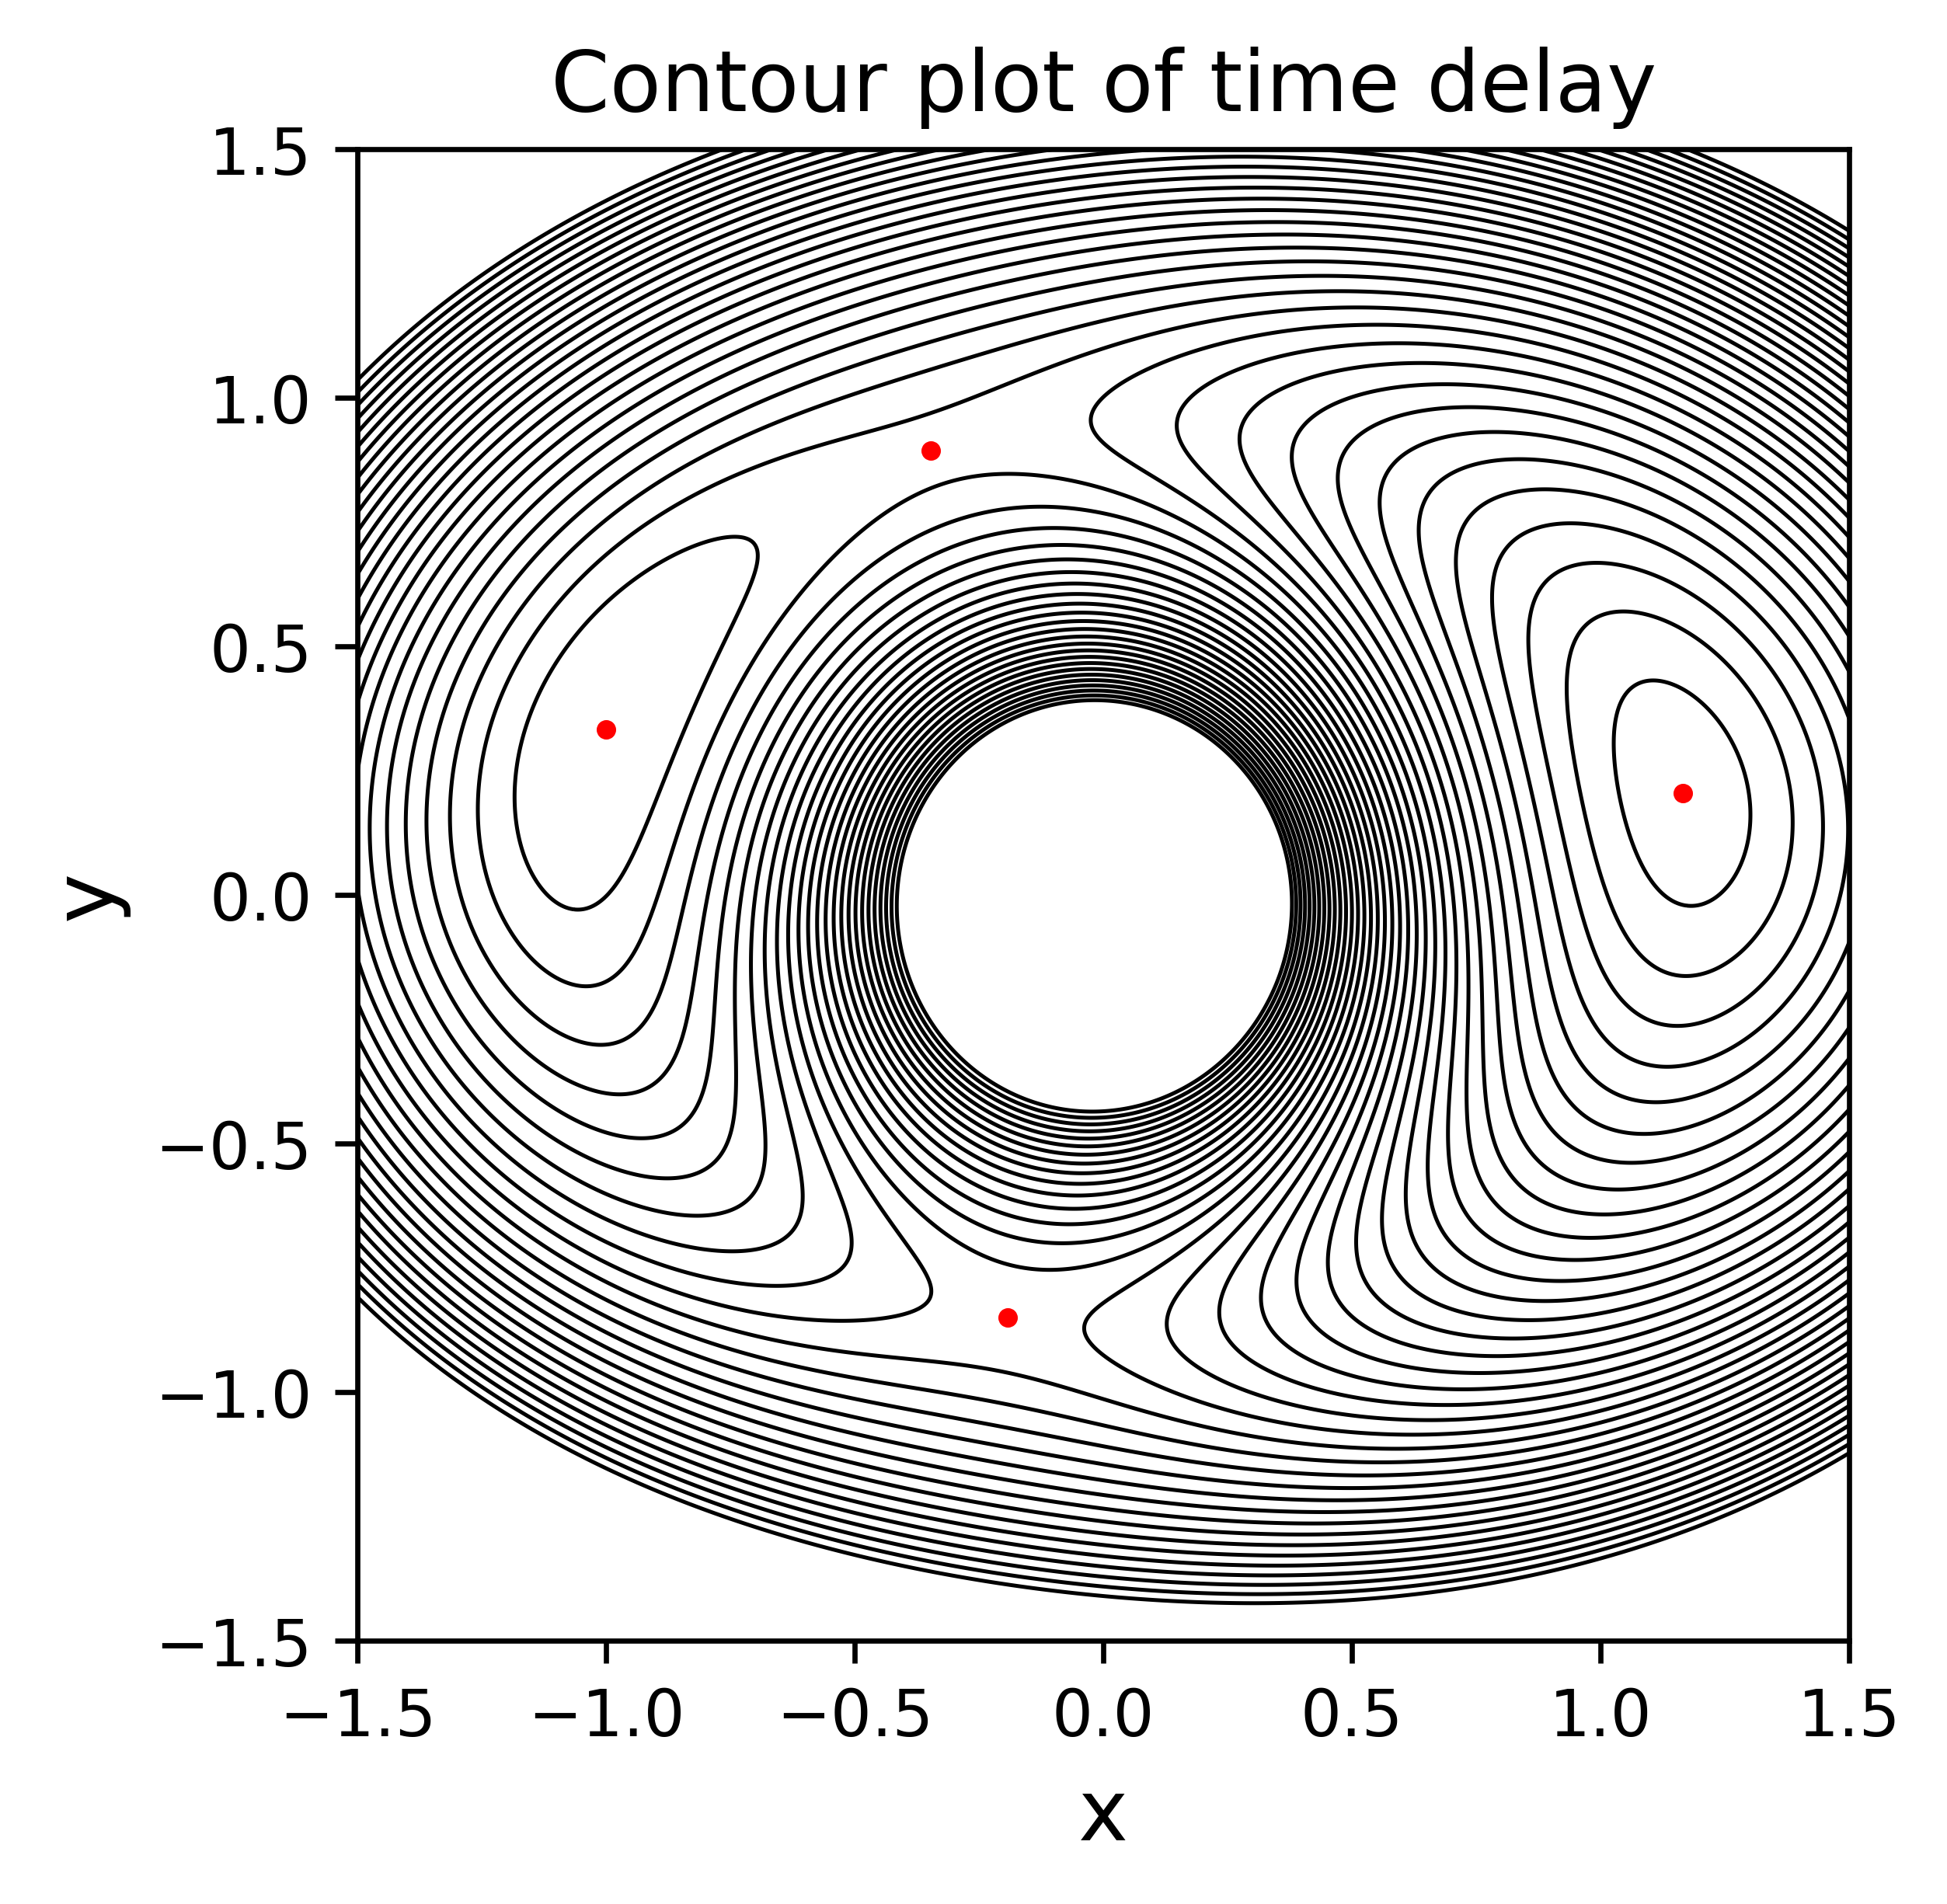

In [12]:
fig = plt.figure(dpi=600)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
plt.scatter(x,y,color='r',s=4)
cp = ax.contour(X, Y, tau,np.linspace(0,1,50),linewidths=0.6, extent=[-2,2,-2,2], colors='black')
plt.gca().set_aspect('equal', adjustable='box')
cp.ax.set_ylabel('y', fontsize=13)
cp.ax.set_xlabel('x', fontsize=13)

plt.title('Contour plot of time delay', fontsize=13)
#a=plt.colorbar(cset)
#a.set_label("time delay", fontsize=13)
plt.savefig('contour_plot_with_points')
plt.show()


## Histogram $ \psi (t)$

In [18]:
#I calculate the time delays for the critical points
x=np.array(x)
y=np.array(y)
tau_critical=tau_point_mass(x,y,x_0,y_0,r_0)


index_min1=2
index_min2=0
index_saddle1=1
index_saddle2=3

mu_saddle1=mu_critical_xy(x[index_saddle1],y[index_saddle1])
mu_saddle2=mu_critical_xy(x[index_saddle2],y[index_saddle2])
mu_min1=mu_critical_xy(x[index_min1],y[index_min1])
mu_min2=mu_critical_xy(x[index_min2],y[index_min2])

tau_saddle1=tau_critical[index_saddle1]
tau_saddle2=tau_critical[index_saddle2]
tau_min1=tau_critical[index_min1]
tau_min2=tau_critical[index_min2]


In [19]:
def plot_hist_parts(part,n_bins=100):
    values, bins, _ = plt.hist(part, n_bins, color='gray', weights=dx[:len(part)]*dx[:len(part)]/(np.max(part)-np.min(part))*n_bins*1/(2*np.pi))
    return values, bins

In [22]:
tau_for_hist=tau.flatten()
dx=np.ones(len(tau_for_hist))*(xmax-xmin)/(n_steps)  #size of the step in the grid. in the lens frame of reference


first_part=[]
second_part=[]
third_part=[]
fourth_part=[]

for i in tau_for_hist:
    if i<tau_min1:
        first_part.append(i)
    elif tau_min1<i<=tau_saddle1:
        second_part.append(i)
    elif tau_saddle1 <i<tau_saddle2:
        third_part.append(i)
    elif tau_saddle2<i<1.:
        fourth_part.append(i)
    else:
        pass

In [38]:
len(bins_1)

101

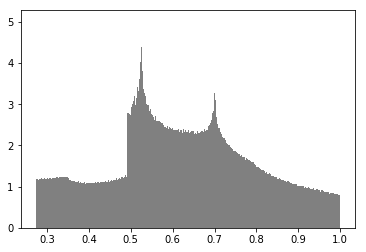

In [23]:
values_1, bins_1=plot_hist_parts(first_part)
values_2, bins_2=plot_hist_parts(second_part)
values_3, bins_3=plot_hist_parts(third_part)
values_4, bins_4=plot_hist_parts(fourth_part)
plt.show()

## Without the critical points

In [24]:
hist_time_step_1=np.diff(bins_1)[0] 
hist_time_step_2=np.diff(bins_2)[0] 
hist_time_step_3=np.diff(bins_3)[0] 
hist_time_step_4=np.diff(bins_4)[0] 

def contribute_min(mu_min):
    return np.sqrt(mu_min)

def contribute_saddle(mu_saddle, tau_1, tau_saddle, step, j):
    return (-1/np.pi) * np.sqrt(-mu_saddle)*np.log((np.abs(tau_1+ step*j - tau_saddle)))


In [25]:
print(mu_saddle1,mu_saddle2, mu_min1,mu_min2)

-1.8346114999962866 -0.7989418088934689 2.283103596672466 1.3921219905255446


In [26]:
print(tau_critical[index_saddle1],tau_critical[index_saddle2], tau_critical[index_min1],tau_critical[index_min2])

0.5248888606456072 0.700082881566114 0.49065307550452697 0.2731365210969925


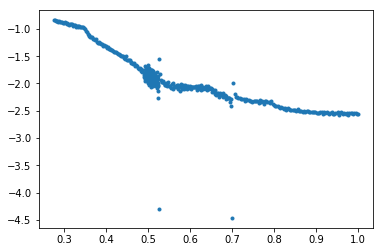

In [51]:
b_min1_min2=[]
a_min1_min2=[]

b_min2_saddle1=[]
a_min2_saddle1=[]

b_saddle1_saddle2=[]
a_saddle1_saddle2=[]

b_saddle2=[]
a_saddle2=[]


#min2_min1
    
for j,bin_val in enumerate(bins_1[:-1],1):
        b= contribute_min(mu_min2)+contribute_saddle(mu_saddle2,tau_min2,tau_saddle2,hist_time_step_1,j)+contribute_saddle(mu_saddle1,tau_min2,tau_saddle1,hist_time_step_1,j)
        a_min1_min2.append(tau_min2+hist_time_step_1*j)
        b_min1_min2.append(b)
    
#min1_saddle1
for j,bin_val in enumerate(bins_2[:-1],1):
        b=contribute_min(mu_min2) +contribute_min(mu_min1)+contribute_saddle(mu_saddle2,tau_min1,tau_saddle2,hist_time_step_2,j)+contribute_saddle(mu_saddle1,tau_min1,tau_saddle1,hist_time_step_2,j)
        a_min2_saddle1.append(tau_min1+hist_time_step_2*j)
        b_min2_saddle1.append(b)
    

#saddle1_saddle2
for j,bin_val in enumerate(bins_3[:-1],1):
        b= contribute_min(mu_min2) +contribute_min(mu_min1)+ contribute_saddle(mu_saddle2,tau_saddle1,tau_saddle2,hist_time_step_3,j)+contribute_saddle(mu_saddle1,tau_saddle1,tau_saddle1,hist_time_step_3,j)
        a_saddle1_saddle2.append(tau_saddle1+hist_time_step_3*j)
        b_saddle1_saddle2.append(b)
    
#saddle2--
for j,bin_val in enumerate(bins_4[:-1],1):
        b=contribute_min(mu_min2)+ contribute_min(mu_min1)+contribute_saddle(mu_saddle1,tau_saddle2,tau_saddle1,hist_time_step_4,j)+contribute_saddle(mu_saddle2,tau_saddle2,tau_saddle2,hist_time_step_4,j)
        a_saddle2.append(tau_saddle2+hist_time_step_4*j)
        b_saddle2.append(b)
    
a=np.concatenate((a_min1_min2,a_min2_saddle1,a_saddle1_saddle2,a_saddle2))
b=np.concatenate((values_1-b_min1_min2,values_2-b_min2_saddle1,values_3-b_saddle1_saddle2,values_4-b_saddle2))

plt.plot(a,b, '.')
#plt.xlim(0., 2)


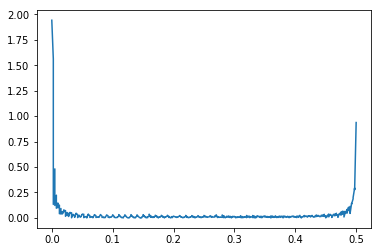

In [53]:
psi_w_smooth=ifft(b)
magnification_smooth=abs(psi_w_smooth)
#bin_center_smooth = bins_smooth[:-1] + np.diff(bins_smooth) / 2
X = fftpack.irfft(b)
freqs = fftpack.rfftfreq(n=b.size)# ,d=1/(2*bin_center.size))
plt.plot(freqs, np.abs(X),'-')
